# **Anomaly Detection and Data Labeling

# **IMPORT THE REQUIRES LIBRARIES**

In [ ]:
!pip install modAL
!pip install activelearner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.9/341.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.3 MB/s eta 0:00:00
  Created wheel for grpclib: filename=grpclib-0.4.3-py3-none-any.whl size=77059 sha256=1958fb0e87a439858a2e73e297a877b053a1d7a37cbb9a9d46cb3a3ca58117b5
  Stored in directory: /root/.cache/pip/wheels/e0/49/4d/31aa7f3f43e9833b8e79204457b404ad4434fc2278a32fa9f1
Successfully built grpclib
  Attempting unins

In [ ]:
!pip3 install modAL-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 4.6 MB/s eta 0:00:00


In [ ]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from modAL.models import ActiveLearner
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Load Dataset

In [ ]:
# Load the XLSX file into a pandas DataFrame
df = pd.read_excel('/content/drive/MyDrive/SWaT_dataset_Jul19v2_clean.xlsx')

# Print the first 5 rows of the DataFrame
print(df.head())

               Timestamp   FIT 101     LIT 101  MV 101  P1_STATE  P101 Status  \
0  20/07/2019 4:39:59 PM  4.323736  492.896881       2         2            2   
1  20/07/2019 4:39:58 PM  4.323736  492.465100       2         2            2   
2  20/07/2019 4:39:57 PM  4.303558  492.308100       2         2            2   
3  20/07/2019 4:39:56 PM  4.253915  491.405273       2         2            2   
4  20/07/2019 4:39:55 PM  4.200429  491.169769       2         2            2   

   P102 Status     AIT 201   AIT 202     AIT 203  ...  LSH 601 LSH 602  \
0            1  131.408615  9.313829  257.933868  ...   Active  Active   
1            1  131.408615  9.316713  257.703156  ...   Active  Active   
2            1  131.408615  9.317354  257.703156  ...   Active  Active   
3            1  131.408615  9.317354  257.703156  ...   Active  Active   
4            1  131.408615  9.319918  257.703156  ...   Active  Active   

    LSH 603   LSL 601   LSL 602  LSL 603  P6 STATE  P601 Status  P60

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **DATA EXPLORATION**

In [ ]:
# Print the shape of the DataFrame (number of rows and columns)
print(df.shape)

# Print the column names of the DataFrame
print(df.columns)

(14996, 78)
Index(['Timestamp', 'FIT 101', 'LIT 101', 'MV 101', 'P1_STATE', 'P101 Status',
       'P102 Status', 'AIT 201', 'AIT 202', 'AIT 203', 'FIT 201', 'LS 201',
       'LS 202', 'LSL 203', 'LSLL 203', 'MV201', 'P2_STATE', 'P201 Status',
       'P202 Status', 'P203 Status', 'P204 Status', 'P205 Status',
       'P206 Status', 'P207 Status', 'P208 Status', 'AIT 301', 'AIT 302',
       'AIT 303', 'DPIT 301', 'FIT 301', 'LIT 301', 'MV 301', 'MV 302',
       'MV 303', 'MV 304', 'P3_STATE', 'P301 Status', 'P302 Status', 'AIT 401',
       'AIT 402', 'FIT 401', 'LIT 401', 'LS 401', 'P4_STATE', 'P401 Status',
       'P402 Status', 'P403 Status', 'P404 Status', 'UV401', 'AIT 501',
       'AIT 502', 'AIT 503', 'AIT 504', 'FIT 501', 'FIT 502', 'FIT 503',
       'FIT 504', 'MV 501', 'MV 502', 'MV 503', 'MV 504', 'P5_STATE',
       'P501 Status', 'P502 Status', 'PIT 501', 'PIT 502', 'PIT 503',
       'FIT 601', 'LSH 601', 'LSH 602', 'LSH 603', 'LSL 601', 'LSL 602',
       'LSL 603', 'P6 STATE',

In [ ]:
# Print summary statistics of numerical columns
print(df.describe())

            FIT 101       LIT 101        MV 101      P1_STATE   P101 Status  \
count  14996.000000  14996.000000  14996.000000  14996.000000  14996.000000   
mean       0.740876    733.960251      1.156175      2.061616      1.374166   
std        1.634632    110.960185      0.384272      0.240466      0.483923   
min        0.000000    491.169769      0.000000      2.000000      1.000000   
25%        0.000000    640.595184      1.000000      2.000000      1.000000   
50%        0.000000    819.636841      1.000000      2.000000      1.000000   
75%        0.000000    820.971436      1.000000      2.000000      2.000000   
max        4.403484    825.092957      2.000000      3.000000      2.000000   

       P102 Status       AIT 201       AIT 202       AIT 203       FIT 201  \
count      14996.0  14996.000000  14996.000000  14996.000000  14996.000000   
mean           1.0    138.766501      9.210022    247.985162      0.869760   
std            0.0      8.265845      0.175812     11.

In [ ]:
# Print the number of unique values in each column
print(df.nunique())

Timestamp      14991
FIT 101          310
LIT 101         4493
MV 101             3
P1_STATE           2
               ...  
LSL 603            1
P6 STATE           1
P601 Status        2
P602 Status        1
P603 Status        1
Length: 78, dtype: int64


In [ ]:
# Print the data types of each column
print(df.dtypes)

Timestamp       object
FIT 101        float64
LIT 101        float64
MV 101           int64
P1_STATE         int64
                ...   
LSL 603         object
P6 STATE         int64
P601 Status      int64
P602 Status      int64
P603 Status      int64
Length: 78, dtype: object


In [ ]:
# Print the number of missing values in each column
print(df.isnull().sum())

Timestamp      0
FIT 101        0
LIT 101        0
MV 101         0
P1_STATE       0
              ..
LSL 603        0
P6 STATE       0
P601 Status    0
P602 Status    0
P603 Status    0
Length: 78, dtype: int64


In [ ]:
print(df.head)

<bound method NDFrame.head of                     Timestamp   FIT 101     LIT 101  MV 101  P1_STATE  \
0       20/07/2019 4:39:59 PM  4.323736  492.896881       2         2   
1       20/07/2019 4:39:58 PM  4.323736  492.465100       2         2   
2       20/07/2019 4:39:57 PM  4.303558  492.308100       2         2   
3       20/07/2019 4:39:56 PM  4.253915  491.405273       2         2   
4       20/07/2019 4:39:55 PM  4.200429  491.169769       2         2   
...                       ...       ...         ...     ...       ...   
14991  20/07/2019 12:30:04 PM  0.000000  727.706900       1         3   
14992  20/07/2019 12:30:03 PM  0.000000  728.688200       1         3   
14993  20/07/2019 12:30:02 PM  0.000000  729.120000       1         3   
14994  20/07/2019 12:30:01 PM  0.000000  729.434000       1         3   
14995  20/07/2019 12:30:00 PM  0.000000  729.865800       1         3   

       P101 Status  P102 Status     AIT 201   AIT 202     AIT 203  ...  \
0                2 

# **DATA PREPROCESSING**

In [ ]:
# Convert Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
# Subset the dataset to only include records between 12:35 PM and 4:35 PM on 20 July 2019
start_time = pd.to_datetime("2019-07-20 12:35:00")
end_time = pd.to_datetime("2019-07-20 16:35:00")
df = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)]

In [ ]:
# Print the shape of the DataFrame (number of rows and columns)
print(df.shape)

(14397, 78)


In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Encoding and Filtering

In [ ]:
# Select only the categorical columns
cat_cols = ["P1_STATE", "P2_STATE", "P3_STATE", "P4_STATE", "P5_STATE", "P6 STATE",
            "P101 Status", "P102 Status", "P201 Status", "P202 Status", "P203 Status",
            "P204 Status", "P205 Status", "P206 Status", "P207 Status", "P208 Status",
            "P301 Status", "P302 Status", "LS 201", "LS 202", "LSL 203", "LSLL 203",
            "MV201", "MV 301", "MV 302", "MV 303", "MV 304", "UV401",
            "MV 501", "MV 502", "MV 503", "MV 504",
            "P501 Status", "P502 Status"]
df_cat = df[cat_cols]

# Perform one-hot encoding on the state columns
ohe = OneHotEncoder(sparse=False)
state_ohe = ohe.fit_transform(df_cat[["P1_STATE", "P2_STATE", "P3_STATE",
                                      "P4_STATE", "P5_STATE", "P6 STATE"]])
state_ohe_df = pd.DataFrame(state_ohe, columns=ohe.get_feature_names_out(["P1_STATE",
                                                                      "P2_STATE",
                                                                      "P3_STATE",
                                                                      "P4_STATE",
                                                                      "P5_STATE",
                                                                      "P6 STATE"]))
df_cat = pd.concat([df_cat, state_ohe_df], axis=1).drop(["P1_STATE",
                                                         "P2_STATE",
                                                         "P3_STATE",
                                                         "P4_STATE",
                                                         "P5_STATE",
                                                         "P6 STATE"], axis=1)

# Perform label encoding on the status columns
le = LabelEncoder()
for col in df_cat.columns:
    if col.startswith("LS") or col.startswith("MV") or col.startswith("UV") or col.endswith("Status") and col !="Timestamp":
        df_cat[col] = le.fit_transform(df_cat[col])

# Overwrite only the categorical columns in df with the encoded columns from df_cat
df.update(df_cat)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Data Labeling and Normalizing**

In [ ]:
df = df.set_index('Timestamp')
# Label the attacks as binary
df['Attack'] = 0
# Attack on FIT401
df.loc[(df.index >= pd.to_datetime("2019-07-20 15:08:46")) & (df.index <= pd.to_datetime("2019-07-20 15:10:31")), 'Attack'] = 1
# Attack on LIT301
df.loc[(df.index >= pd.to_datetime("2019-07-20 15:15:00")) & (df.index <= pd.to_datetime("2019-07-20 15:19:32")), 'Attack'] = 1
# Attack on P601
df.loc[(df.index >= pd.to_datetime("2019-07-20 15:26:57")) & (df.index <= pd.to_datetime("2019-07-20 15:30:48")), 'Attack'] = 1
# Multi-point Attack
df.loc[(df.index >= pd.to_datetime("2019-07-20 15:38:50")) & (df.index <= pd.to_datetime("2019-07-20 15:46:20")), 'Attack'] = 1
# Attack on MV501
df.loc[(df.index >= pd.to_datetime("2019-07-20 15:54:00")) & (df.index <= pd.to_datetime("2019-07-20 15:56:00")), 'Attack'] = 1
# Attack on P301
df.loc[(df.index >= pd.to_datetime("2019-07-20 16:02:56")) & (df.index <= pd.to_datetime("2019-07-20 16:16:18")), 'Attack'] = 1

In [ ]:
total_labeled_rows = len(df[df['Attack'] == 1])
print("Total number of rows labeled with attacks:", total_labeled_rows)
total_nonlabeled_rows = len(df[df['Attack'] == 0])
print("Total number of rows not labeled:", total_nonlabeled_rows)

Total number of rows labeled with attacks: 1986
Total number of rows not labeled: 12411


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate the Attack column
attack_series = df.pop('Attack')

# Normalize the numeric columns, exclude the Attack column
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col != 'Attack']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Add the Attack column back to the dataframe
df['Attack'] = attack_series

# Fill missing values with zeros
df.fillna(0, inplace=True)

# # Drop unnecessary columns
# columns_to_drop = ['LS 401', 'LSH 601', 'LSH 602', 'LSH 603', 'LSL 601', 'LSL 602', 'LSL 603']
# df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
# Create an instance of LabelEncoder
le = LabelEncoder()

# List of columns to be transformed
columns_to_encode = ['LS 401', 'LSH 601', 'LSH 602', 'LSH 603', 'LSL 601', 'LSL 602', 'LSL 603']

# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

df = df.astype(np.float32)

In [ ]:
print(df.head())

                      FIT 101   LIT 101    MV 101  P1_STATE  P101 Status  \
Timestamp                                                                  
2019-07-20 16:35:00 -0.463164 -1.072026 -0.417491 -0.212852     1.368395   
2019-07-20 16:34:59 -0.463164 -1.061974 -0.417491 -0.212852     1.368395   
2019-07-20 16:34:58 -0.463164 -1.056230 -0.417491 -0.212852     1.368395   
2019-07-20 16:34:57 -0.463164 -1.053357 -0.417491 -0.212852     1.368395   
2019-07-20 16:34:56 -0.463164 -1.046895 -0.417491 -0.212852     1.368395   

                     P102 Status   AIT 201   AIT 202   AIT 203   FIT 201  ...  \
Timestamp                                                                 ...   
2019-07-20 16:35:00          0.0 -0.870361  0.566302  0.009090  1.372166  ...   
2019-07-20 16:34:59          0.0 -0.870361  0.584273  0.009090  1.372166  ...   
2019-07-20 16:34:58          0.0 -0.870361  0.584273  0.009090  1.371237  ...   
2019-07-20 16:34:57          0.0 -0.870361  0.584273  0.009090

In [ ]:
if (df['Attack'] > 0 ).any():
  print("The Attack column has values greater than 0")
else:
  print("it has none")

The Attack column has values greater than 0


In [ ]:
# filtered_df = df[df['Attack'] != 0]
# print(filtered_df)

In [ ]:
print(df.columns)

Index(['FIT 101', 'LIT 101', 'MV 101', 'P1_STATE', 'P101 Status',
       'P102 Status', 'AIT 201', 'AIT 202', 'AIT 203', 'FIT 201', 'LS 201',
       'LS 202', 'LSL 203', 'LSLL 203', 'MV201', 'P2_STATE', 'P201 Status',
       'P202 Status', 'P203 Status', 'P204 Status', 'P205 Status',
       'P206 Status', 'P207 Status', 'P208 Status', 'AIT 301', 'AIT 302',
       'AIT 303', 'DPIT 301', 'FIT 301', 'LIT 301', 'MV 301', 'MV 302',
       'MV 303', 'MV 304', 'P3_STATE', 'P301 Status', 'P302 Status', 'AIT 401',
       'AIT 402', 'FIT 401', 'LIT 401', 'P4_STATE', 'P401 Status',
       'P402 Status', 'P403 Status', 'P404 Status', 'UV401', 'AIT 501',
       'AIT 502', 'AIT 503', 'AIT 504', 'FIT 501', 'FIT 502', 'FIT 503',
       'FIT 504', 'MV 501', 'MV 502', 'MV 503', 'MV 504', 'P5_STATE',
       'P501 Status', 'P502 Status', 'PIT 501', 'PIT 502', 'PIT 503',
       'FIT 601', 'P6 STATE', 'P601 Status', 'P602 Status', 'P603 Status',
       'Attack'],
      dtype='object')


In [ ]:
!pip install modAL


In [ ]:
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import numpy as np

# Function for weak supervision
def weak_label(row):
    # Define attack intents
    attack_intents = [
        {
            'description': "To stop de-chlorination by switching off UV401",
            'features': ['FIT 401', 'UV401'],
            'thresholds': [0.8, 0.5]
        },
        {
            'description': "To eventually lead to underflow in T301",
            'features': ['LIT 301'],
            'thresholds': [835, 1024]
        },
        {
            'description': "To increase water in raw water tank",
            'features': ['P601 Status'],
            'thresholds': [0, 1]  # Switch from OFF to ON
        },
        {
            'description': "To overflow tank T301",
            'features': ['MV201', 'P101 Status'],
            'thresholds': [0, 1]  # Switch from CLOSE to OPEN and OFF to ON
        },
        {
            'description': "To drain water from RO",
            'features': ['MV 501'],
            'thresholds': [1, 0]  # Switch from OPEN to CLOSE
        },
        {
            'description': "To halt stage 3 (UF process)",
            'features': ['P301 Status'],
            'thresholds': [1, 0]  # Switch from ON to OFF
        }
    ]

    # Check if the row's features match the attack intent
    for intent in attack_intents:
        features_match = all(
            row[feature] >= threshold if threshold > 0 else row[feature] <= threshold
            for feature, threshold in zip(intent['features'], intent['thresholds'])
        )
        if features_match:
            return 1  # Weak label for attack intent

    return 0  # Default weak label for normal behavior

# Apply weak supervision and create a new column for weak labels
df['weak_label'] = df.apply(weak_label, axis=1)

# Preparing the data
X = df.drop(['Attack'], axis=1)  # Include weak_label as a feature
y = df['Attack']

# Initialize RandomForest and IsolationForest
rf = RandomForestClassifier(n_estimators=150, random_state=80)
rf.fit(X, y)

iso_forest = IsolationForest(n_estimators=150, contamination=0.2, random_state=80)
iso_forest.fit(X)

# Make predictions
rf_predictions = rf.predict(X)
iso_predictions = iso_forest.predict(X)
iso_predictions_mapped = np.where(iso_predictions == -1, 1, 0)  # Mapping for Isolation Forest

# Combine predictions
combined_predictions = (rf_predictions + iso_predictions_mapped) / 2
final_predictions = np.round(combined_predictions)

# Function to calculate and print metrics including confusion matrix
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("Confusion Matrix:")
    print(cm)

# Evaluate the ensemble model
print("Ensemble Model Evaluation With Weak Label as Feature:")
evaluate_model(y, final_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Ensemble Model Evaluation With Weak Label as Feature:
Accuracy: 0.9118566367993332
F1 Score: 0.5305216426193119
Precision: 1.0
Recall: 0.3610271903323263
Confusion Matrix:
[[12411     0]
 [ 1269   717]]


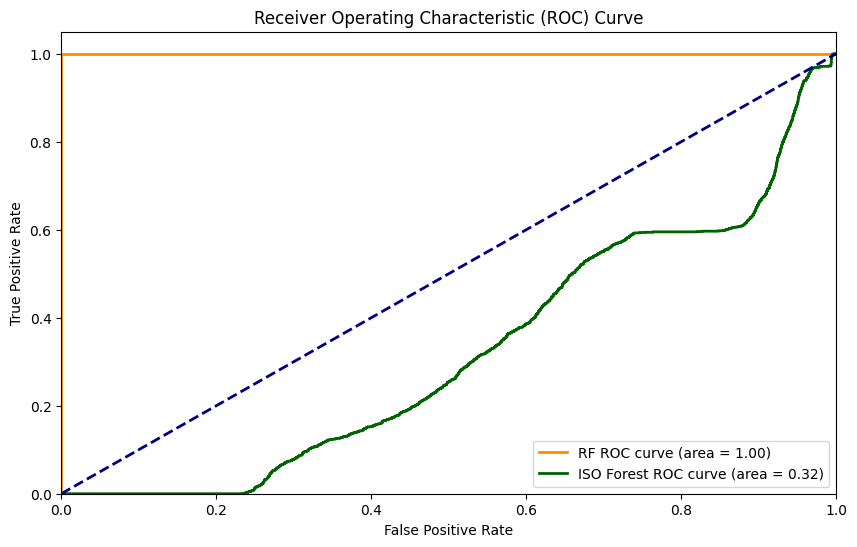

In [ ]:
# ROC AUC curve
rf_probs = rf.predict_proba(X)[:, 1]
iso_forest_probs = (iso_forest.decision_function(X) + 1) / 2  # Normalize the decision function
roc_auc_rf = roc_auc_score(y, rf_probs)
roc_auc_iso_forest = roc_auc_score(y, iso_forest_probs)

fpr_rf, tpr_rf, _ = roc_curve(y, rf_probs)
fpr_iso_forest, tpr_iso_forest, _ = roc_curve(y, iso_forest_probs)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'RF ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_iso_forest, tpr_iso_forest, color='darkgreen', lw=2, label=f'ISO Forest ROC curve (area = {roc_auc_iso_forest:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

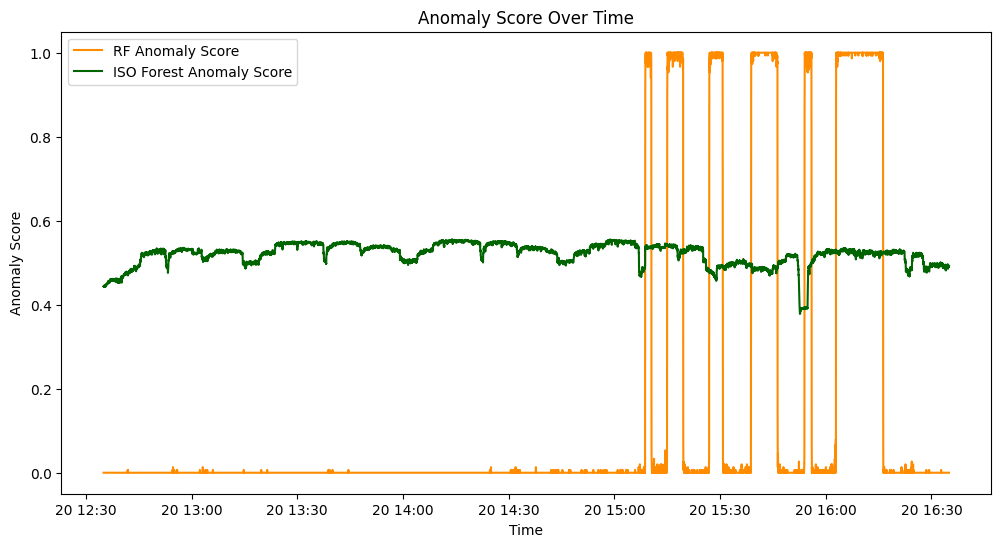

In [ ]:
# Function for active learning loop with fixed number of labels per iteration
def active_learning_loop(X, y, rf, iso_forest, iterations=1, labels_per_iteration=5):
    for i in range(iterations):
        # Get prediction probabilities and anomaly scores
        rf_probs = rf.predict_proba(X)[:, 1]
        iso_scores = iso_forest.decision_function(X)

        # Calculate uncertainty and select the top N uncertain samples
        uncertainty_measure = np.abs(rf_probs - 0.5) + np.abs(iso_scores)
        most_uncertain_indices = np.argsort(uncertainty_measure)[-labels_per_iteration:]

        print(f"Iteration {i+1}: Asking user feedback for {labels_per_iteration} most uncertain samples.")
        for index in most_uncertain_indices:
            print(f"Data: {X.iloc[index]}")
            correct_label = int(input("Enter the correct label (0 or 1): "))
            y.iloc[index] = correct_label  # Update the label with user input

        # Re-train the models
        rf.fit(X, y)
        iso_forest.fit(X)

        # Evaluate and print the updated model performance
        print("Updated Model Evaluation:")
        final_predictions = np.round((rf.predict(X) + np.where(iso_forest.predict(X) == -1, 1, 0)) / 2)
        evaluate_model(y, final_predictions)

# Call the active learning loop
active_learning_loop(X, y, rf, iso_forest)


Iteration 1: Asking user feedback for 5 most uncertain samples.
Data: FIT 101       -0.463164
LIT 101        0.748186
MV 101        -0.417491
P1_STATE      -0.212852
P101 Status   -0.730783
                 ...   
P6 STATE       0.000000
P601 Status   -0.127416
P602 Status    0.000000
P603 Status    0.000000
weak_label     1.000000
Name: 2019-07-20 15:53:05, Length: 78, dtype: float64
Enter the correct label (0 or 1): 1


<ipython-input-15-2d0f9bcf2da8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[index] = correct_label  # Update the label with user input


Data: FIT 101       -0.463164
LIT 101        0.744955
MV 101        -0.417491
P1_STATE      -0.212852
P101 Status   -0.730783
                 ...   
P6 STATE       0.000000
P601 Status   -0.127416
P602 Status    0.000000
P603 Status    0.000000
weak_label     1.000000
Name: 2019-07-20 15:53:07, Length: 78, dtype: float64
Enter the correct label (0 or 1): 0


<ipython-input-15-2d0f9bcf2da8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[index] = correct_label  # Update the label with user input


Data: FIT 101       -0.463164
LIT 101        0.746750
MV 101        -0.417491
P1_STATE      -0.212852
P101 Status   -0.730783
                 ...   
P6 STATE       0.000000
P601 Status   -0.127416
P602 Status    0.000000
P603 Status    0.000000
weak_label     1.000000
Name: 2019-07-20 15:53:06, Length: 78, dtype: float64
Enter the correct label (0 or 1): 1


<ipython-input-15-2d0f9bcf2da8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[index] = correct_label  # Update the label with user input


Data: FIT 101       -0.463164
LIT 101        0.742441
MV 101        -0.417491
P1_STATE      -0.212852
P101 Status   -0.730783
                 ...   
P6 STATE       0.000000
P601 Status   -0.127416
P602 Status    0.000000
P603 Status    0.000000
weak_label     1.000000
Name: 2019-07-20 15:53:11, Length: 78, dtype: float64
Enter the correct label (0 or 1): 1


<ipython-input-15-2d0f9bcf2da8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[index] = correct_label  # Update the label with user input


Data: FIT 101       -0.463164
LIT 101        0.743159
MV 101        -0.417491
P1_STATE      -0.212852
P101 Status   -0.730783
                 ...   
P6 STATE       0.000000
P601 Status   -0.127416
P602 Status    0.000000
P603 Status    0.000000
weak_label     1.000000
Name: 2019-07-20 15:53:12, Length: 78, dtype: float64
Enter the correct label (0 or 1): 1


<ipython-input-15-2d0f9bcf2da8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[index] = correct_label  # Update the label with user input
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Updated Model Evaluation:
Accuracy: 0.9118566367993332
F1 Score: 0.5366922234392113
Precision: 1.0
Recall: 0.36676646706586824
Confusion Matrix:
[[12393     0]
 [ 1269   735]]
